In [3]:
# Package imports for data science
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

df = pd.read_csv('C:/DSAI_2021-22/Voorbereiding_Examen/chi²/turnover.csv', delimiter=';')

df.head()

,Turnover,Department
0,Current Employee,Sales
1,Former Employee,Warehouse
2,Former Employee,Service
3,Former Employee,Warehouse
4,Former Employee,Sales


In [4]:
alpha = 0.05

observed = pd.crosstab(df.Department, df.Turnover)

chi2, p, dof, expected = stats.chi2_contingency(observed)

g = stats.chi2.isf(alpha, df=dof)  # Critical value

# (observed - expected)**2 / expected

print("Chi-squared   χ² = %.4f" % chi2)
print("Critical value g = %.4f" % g)
print("p-value        p = %f"   % p)

Chi-squared   χ² = 25.7390
Critical value g = 5.9915
p-value        p = 0.000003


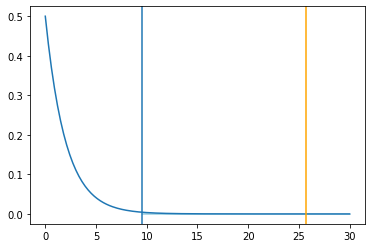

In [5]:
# x-values:
x = np.linspace(0, 30, num=200)

# probability density of the chi-squared distribution
y = stats.chi2.pdf(x, df=dof)

# the number q for which the right tail probability is exactly 1%:
q = stats.chi2.isf(alpha, df=4)  # TODO: CHECK this!

fig, tplot = plt.subplots(1, 1)

tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared